In [1]:
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = sm.datasets.fair.load_pandas()
df = data.data


In [3]:
df['affairs'].value_counts()

0.000000     4313
1.400000      118
0.583333       86
0.400000       72
1.333333       72
             ... 
0.622222        1
39.199982       1
7.111111        1
4.923077        1
0.339394        1
Name: affairs, Length: 77, dtype: int64

In [4]:
df['affair'] = 0
index = df[df['affairs'] > 0 ].index
df.iloc[index , -1] =1
df.drop('affairs',axis=1,inplace=True)

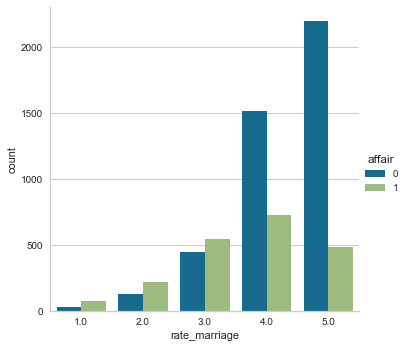

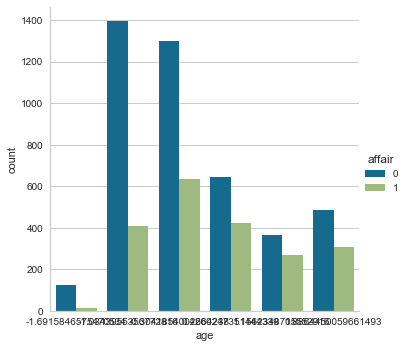

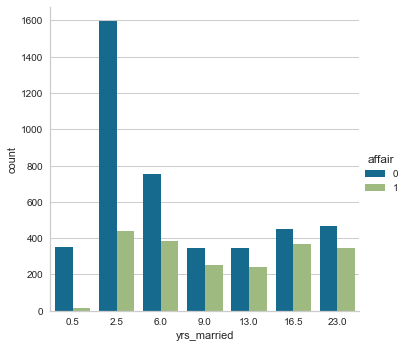

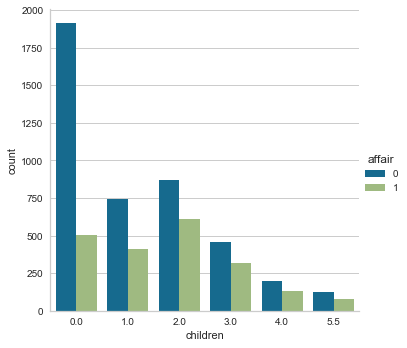

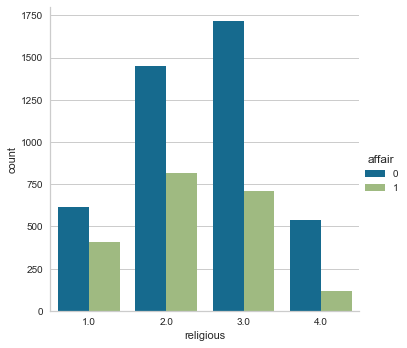

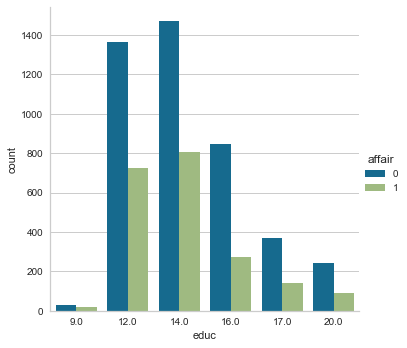

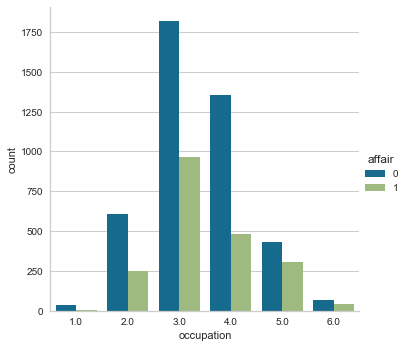

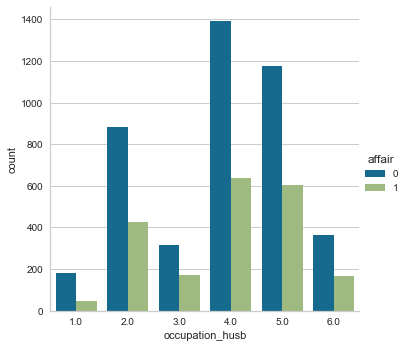

In [37]:
def plt_ct(var):
    g = sns.catplot(x=var,hue='affair', data=df, kind="count")

for i in df.columns[:-1]:
    plt_ct(i)

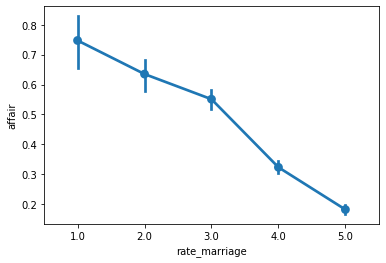

In [7]:
sns.pointplot(x='rate_marriage',y ='affair',data =df)

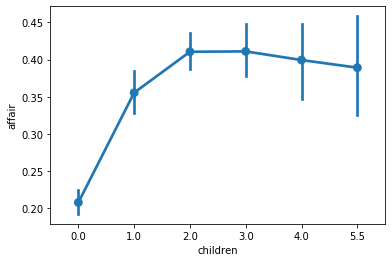

In [8]:
sns.pointplot(x='children',y ='affair',data =df)

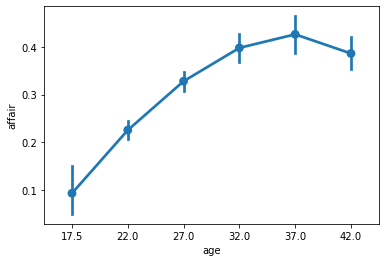

In [9]:
sns.pointplot(x='age',y ='affair',data =df)

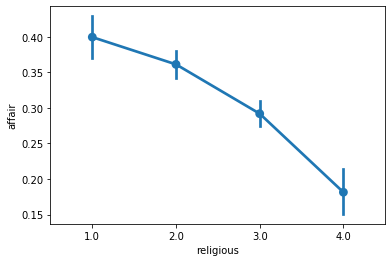

In [10]:
sns.pointplot(x='religious',y ='affair',data =df)

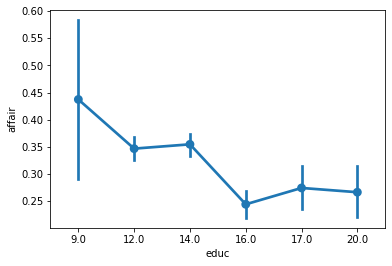

In [11]:
sns.pointplot(x='educ',y ='affair',data =df)

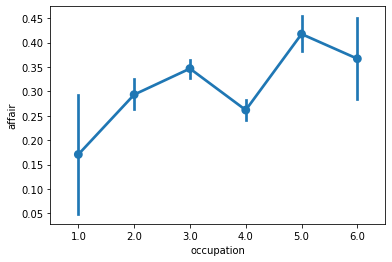

In [12]:
sns.pointplot(x='occupation',y ='affair',data =df)

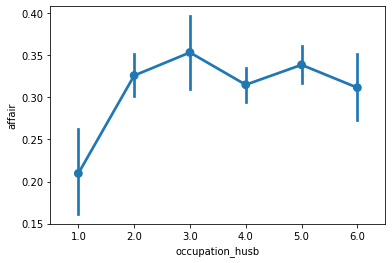

In [13]:
sns.pointplot(x='occupation_husb',y ='affair',data =df)

In [14]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affair'],
      dtype='object')

In [15]:
df['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [16]:
from category_encoders import WOEEncoder
cols = ['rate_marriage','religious','occupation','children','yrs_married','educ']
cols2 = ['age' ]
woe = WOEEncoder(cols=cols)

In [17]:
from sklearn.preprocessing import StandardScaler
df[cols2] = StandardScaler().fit_transform(df[cols2])

In [18]:
df_tr = woe.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])

In [19]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [20]:
sc = cross_val_score(Li(),df_tr.iloc[:,:],df['affair'],cv = 7)
sc.mean() , sc.std()

(0.7304467966419876, 0.013212779591118882)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

x_train,x_test,y_train,y_test = train_test_split(df_tr.iloc[:,:],df['affair'],test_size = 0.25,stratify = df['affair'],random_state =42)

In [22]:
clf = LogisticRegression( )
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred =clf.predict(x_test)

In [24]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[945 134]
 [297 216]]
0.7292713567839196


In [25]:
from yellowbrick.classifier import class_prediction_error,roc_auc,PRCurve

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


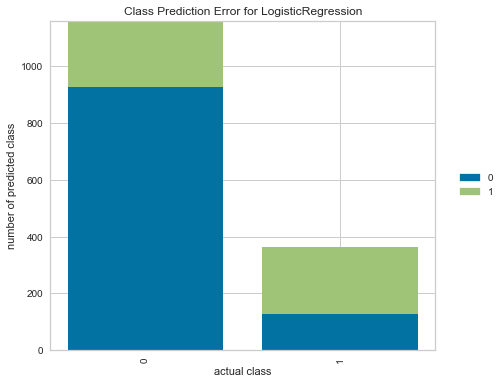

In [26]:
cl = class_prediction_error(clf ,df_tr.iloc[:,:],df['affair'] , test_size =0.25,random_state =42)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


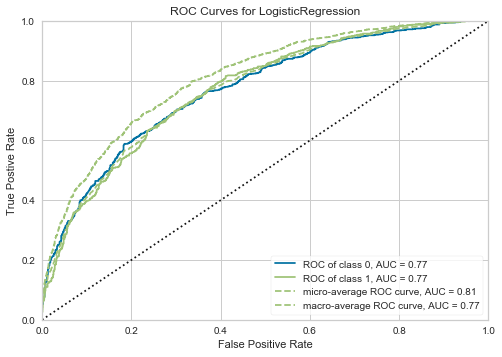

In [27]:
rc = roc_auc(clf ,df_tr.iloc[:,:],df['affair'] , test_size =0.25 ,random_state=42)